In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpldates
import seaborn as sns
from pandas.plotting import _converter
plt.subplots(figsize=(15,4))
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# Leyendo csvs
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

# Exploraciones iniciales

#### Educacion de los postulantes

In [3]:
df_edu.sample(3)

,idpostulante,nombre,estado
137133,akDdzzW,Secundario,Graduado
274661,ow2Vw6L,Universitario,Graduado
27874,86QN1x,Universitario,En Curso


In [4]:
df_edu.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [5]:
print (df_edu.shape)
print (df_edu["idpostulante"].value_counts().count())

(298231, 3)
188752


Se ve que hay postulantes que tienen mas de un nivel educación.

In [6]:
#estas son las variables categoricas de nombre de educacion y estado
df_edu.groupby(["nombre","estado"]).count()

idpostulante
nombre            estado                  
Doctorado         Abandonado            15
                  En Curso              94
                  Graduado             105
Master            Abandonado           144
                  En Curso            1519
                  Graduado            1935
Otro              Abandonado           947
                  En Curso            4919
                  Graduado           18882
Posgrado          Abandonado           317
                  En Curso            2239
                  Graduado            4831
Secundario        Abandonado          3156
                  En Curso            3995
                  Graduado          103105
Terciario/Técnico Abandonado          5692
                  En Curso           15032
                  Graduado           27009
Universitario     Abandonado         14955
                  En Curso           50733
                  Graduado           38607

#### Edad y genero de los postulantes

In [7]:
df_gen_edad.head(3)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM


In [8]:
print (df_gen_edad.shape)
print (df_gen_edad["idpostulante"].value_counts().count())

(200888, 3)
200888


Los valores son unicos entonces no tenemos la educacion de todos los postulanes

In [9]:
# limpieza de fechas invalidas
df_gen_edad["fechanacimiento"] = pd.to_datetime(df_gen_edad["fechanacimiento"], errors="coerce")

def calc_edad(x):    
    if (pd.isnull(x)):
        return -1
    return math.floor((datetime.datetime.today()-x).days / 365)

# calculo edad para cada postulante
df_gen_edad["edad"] = df_gen_edad["fechanacimiento"].apply(calc_edad)

In [10]:
df_gen_edad.describe(include="all")

,idpostulante,fechanacimiento,sexo,edad
count,200888,196131,200888,200888.000000
unique,200888,15020,3,NaN
top,PmVDL4E,1994-05-24 00:00:00,FEM,NaN
freq,1,57,101981,NaN
first,NaN,1775-07-09 00:00:00,NaN,NaN
last,NaN,2006-01-01 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,29.015013
std,NaN,NaN,NaN,9.475339
min,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,23.000000


In [11]:
print(df_gen_edad.shape)
print(df_gen_edad.loc[df_gen_edad['edad']>0].shape)

(200888, 4)
(196131, 4)


Esto indica que hay fechas no validad que al crear la columna edad se setearon negativo.

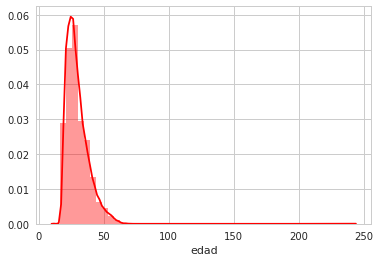

In [12]:
sns.distplot(df_gen_edad.loc[df_gen_edad['edad']> 0]['edad'], color='red', rug=False)

Se observa que hay edades muy altas cercanas a los 250. Filtramos las edades hasta 80 años

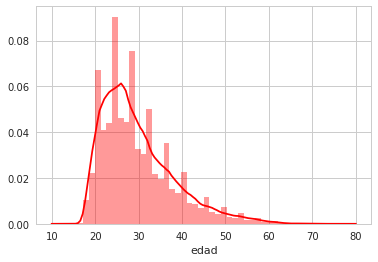

In [13]:
df_gen_edad = df_gen_edad.loc[df_gen_edad['edad'] < 80]
sns.distplot(df_gen_edad.loc[(df_gen_edad['edad'] > 0)]['edad'], color='red', rug=False)

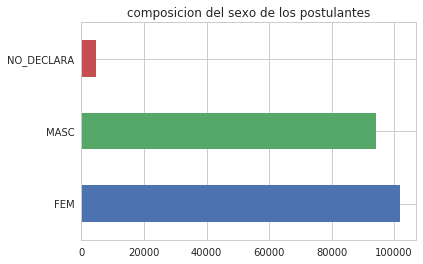

In [14]:
df_gen_edad["sexo"].value_counts().plot(kind="barh", title= "composicion del sexo de los postulantes")

#### VISTAS Y POSTUALCIONES

In [15]:
print(df_vistas.shape)
print(df_vistas.isnull().sum())
df_vistas.sample(3)

(961897, 3)
idAviso         0
timestamp       0
idpostulante    0
dtype: int64


,idAviso,timestamp,idpostulante
337587,1112361471,2018-02-26 14:24:52.818,5PKQNp
368894,1112301407,2018-02-26 16:44:01.322,akD32kD
703507,1112335374,2018-02-28 01:10:08.515,8MLNaoL


In [16]:
df_vistas['date'] = df_vistas['timestamp'].dt.date
df_vistas.head()

,idAviso,timestamp,idpostulante,date
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23


In [17]:
print(df_postulaciones.shape)
print(df_postulaciones.isnull().sum())
df_postulaciones.sample(3)

(3401623, 3)
idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64


,idaviso,idpostulante,fechapostulacion
3117993,1112315062,3NPePRP,2018-02-16 06:53:13
1147292,1112263557,YmzNxV,2018-01-17 13:48:44
794805,1112303914,ak4YmDE,2018-02-14 09:39:45


In [18]:
df_postulaciones['date'] = df_postulaciones['fechapostulacion'].dt.date
df_postulaciones.head()

,idaviso,idpostulante,fechapostulacion,date
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25


In [19]:
df_postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
date                        object
dtype: object

In [20]:
df_postulaciones.describe(include="all")

,idaviso,idpostulante,fechapostulacion,date
count,3.401623e+06,3401623,3401623,3401623
unique,NaN,200888,1940105,45
top,NaN,axmjOE,2018-01-17 07:03:36,2018-02-19
freq,NaN,3166,25,137104
first,NaN,NaN,2018-01-15 00:00:01,NaN
last,NaN,NaN,2018-02-28 23:59:55,NaN
mean,1.111432e+09,NaN,NaN,NaN
std,2.195180e+07,NaN,NaN,NaN
min,8.725750e+06,NaN,NaN,NaN
25%,1.112261e+09,NaN,NaN,NaN


Analisis del rango de fechas

In [21]:
idx1 = pd.Index(df_vistas['date']).drop_duplicates()
idx2 = pd.Index(df_postulaciones['date']).drop_duplicates()
idx=idx1.union(idx2)
idx.drop_duplicates()
df = pd.DataFrame(index = idx)
df.head()

""
date
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19


In [22]:
df['vistas'] = df.index.to_series().apply(lambda x: 1 if x >= df_vistas['date'].min() and x <= df_vistas['date'].max() else np.NaN)
df.sample(5)

,vistas
date,
2018-02-12,NaN
2018-02-16,NaN
2018-02-15,NaN
2018-01-25,NaN
2018-01-24,NaN


In [23]:
df['postulaciones'] = df.index.to_series().apply(lambda x: 2 if x >= df_postulaciones['date'].min() and x <= df_postulaciones['date'].max() else np.NaN)


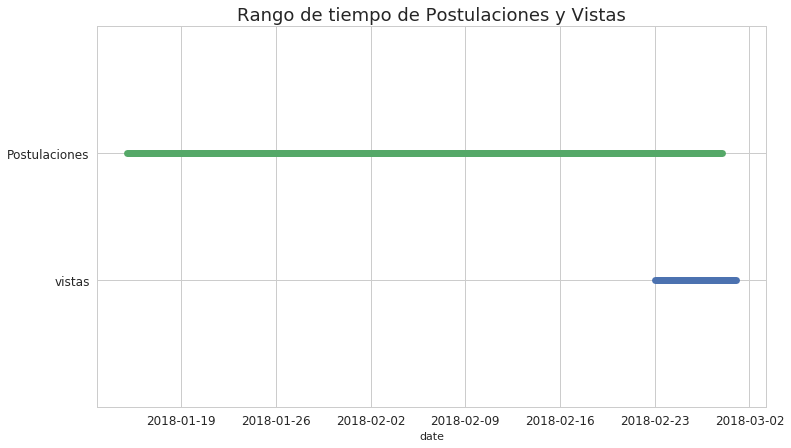

In [24]:
p = df.plot(ylim=[0, 3], legend=False, title ='Rango de tiempo de Postulaciones y Vistas'
            , figsize =(12,7), lw=7, fontsize=12)
p.set_yticks([1., 2.])
p.set_yticklabels(['vistas', 'Postulaciones'])
#p.set_xlabel('Tiempo', size = 15)
p.title.set_size(18)

Se ve que el que menos rango de tiempo ocupa es el vistas entonces se trabaja con el min de vistas y el max de postulaciones

In [25]:
print ("max:",df_vistas['date'].min())
print ("min:",df_postulaciones['date'].max())
print (df_postulaciones['date'].max()-df_vistas['date'].min())

max: 2018-02-23
min: 2018-02-28
5 days, 0:00:00


In [26]:
del df

#### AVISOS

In [27]:
df_avisos_detalle.head(10)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola


In [28]:
df_avisos_detalle.describe(include="all")

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
count,1.353400e+04,13534.0,13534,13534,13534,47,872,13534,13534,13534,13529
unique,NaN,NaN,11650,12674,4,18,487,9,5,173,2592
top,NaN,NaN,Analistas de Testing Ssr/Sr con Automatización...,<p>Nos encontramos en la búsqueda de un ANALIS...,Gran Buenos Aires,Buenos Aires,SARMIENTO 1937,Full-time,Senior / Semi-Senior,Ventas,RANDSTAD
freq,NaN,NaN,22,19,12654,14,43,12339,9407,1659,562
mean,1.110816e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.235817e+07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.585950e+06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.112222e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.112279e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.112339e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿Cuáles areas tienen mayor cantidad de postulaciones por nivel educativo?

In [29]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))

df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")

df_edu_max_postulaciones = df_edu_unicos_max.merge(df_postulaciones, on = "idpostulante")

df_aviso_corto = df_avisos_detalle[["idaviso","tipo_de_trabajo","nivel_laboral","nombre_area"]]

df_max_post_detalle = df_edu_max_postulaciones.merge(df_aviso_corto, on = "idaviso")

In [30]:
def top_n_areas_graduados(n, educacion):
    top_10_areas_graduados_secundario = df_max_post_detalle[(df_max_post_detalle["nombre"] == educacion) & (df_max_post_detalle["estado"] == "Graduado")] \
                                        .groupby("nombre_area")['idpostulante']\
                                        .count() \
                                        .sort_values(ascending=False) \
                                        .head(n)

    g = sns.barplot(x=top_10_areas_graduados_secundario.values, y=top_10_areas_graduados_secundario.index, orient='h', palette="hls")
    g.set_title("Postulantes graduados de nivel {0} por area".format(educacion.lower()), fontsize=18)
    g.set_xlabel("Cantidad de graduados", fontsize=12)
    g.set_ylabel("Nombre del Area", fontsize=12)
    plt.subplots_adjust(top=0.9)

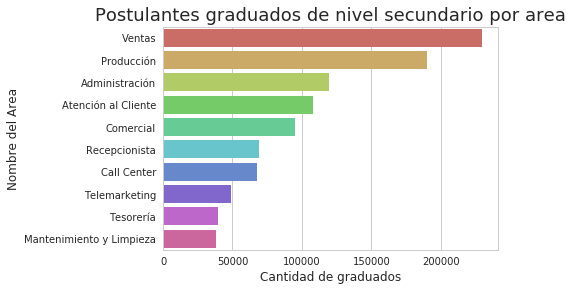

In [31]:
top_n_areas_graduados(10, "Secundario")    

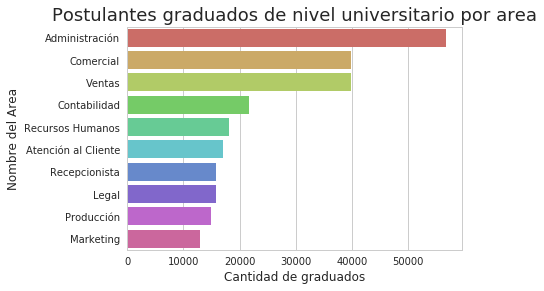

In [32]:
top_n_areas_graduados(10, "Universitario")

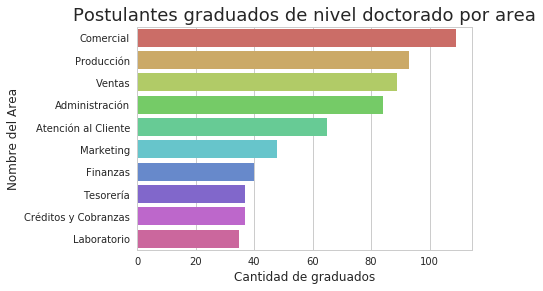

In [33]:
top_n_areas_graduados(10, "Doctorado")

# ¿Cómo se distribuye la edad en los distintos niveles educativos?

In [34]:
df_edu_unicos_con_edad = df_edu_unicos_max.loc[df_edu_unicos_max['estado'] == 'Graduado']\
                                          .merge(df_gen_edad, on='idpostulante')

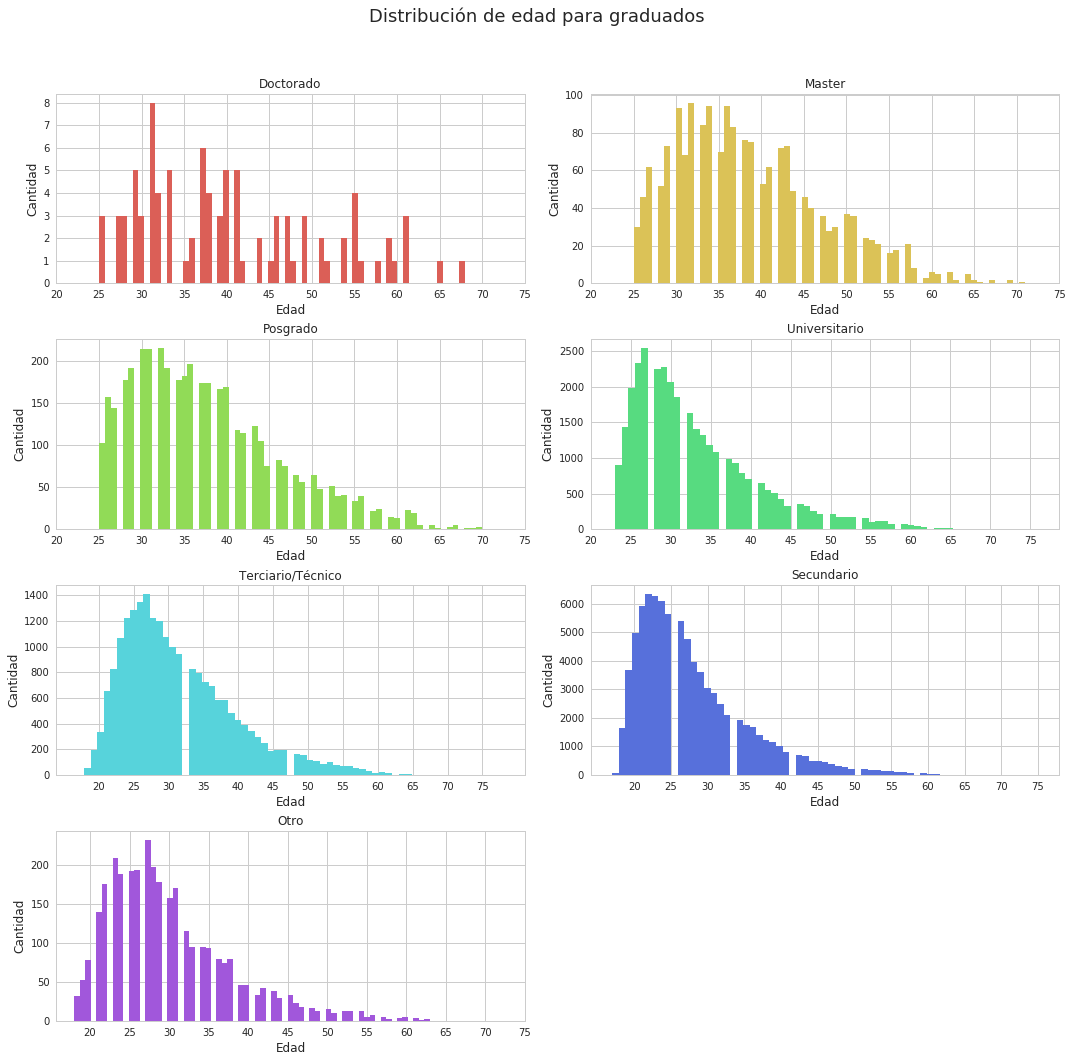

In [35]:
df_edu_unicos_con_edad = df_edu_unicos_con_edad.loc[df_edu_unicos_con_edad['edad'] > 0]
    
fig, axes = plt.subplots(4, 2, figsize=(15,15))

fig.suptitle("Distribución de edad para graduados", fontsize=18)

nombres = list(orden_nombre.keys())

# no parece coherente que haya personas de 20 años con doctorado, por lo 
# que vamos a fijar edades minimas esperadas
edad_minima_nivel_educativo = {
    "Doctorado": 25,
    "Master": 25,
    "Posgrado": 25,
    "Universitario": 23,
    "Terciario/Técnico": 0,
    "Secundario": 0,
    "Otro": 0
}

# no queremos que los casos aislados nos sesguen los gráficos
LIM_SUP_EDAD = 80

indice_nivel = 0

colores = sns.color_palette("hls", 8)

for i in range(0, 4):
    for j in range(0, 2):
        ax = axes[i][j]
        
        # tenemos 8 axes para 7 niveles de educacion, ocultamos el ultimo que quedaria vacio
        if i == 3 and j == 1:
            ax.set_visible(False)
            break
                
        nom = nombres[indice_nivel]
        
        serie = df_edu_unicos_con_edad.groupby(['nombre']) \
                                      .get_group(nom)['edad']
            
        serie = serie.loc[(edad_minima_nivel_educativo[nom] <= serie) & (serie <= LIM_SUP_EDAD)]
        
        ticks = np.arange(20, 80, 5)
        
        ax.hist(serie, 80 - 15, color=colores[indice_nivel]) # uno para cada edad
        ax.set_title(nom)
        ax.set_xticks(ticks)
        ax.set_xlabel("Edad", fontsize=12)
        ax.set_ylabel("Cantidad", fontsize=12)
        indice_nivel += 1
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)

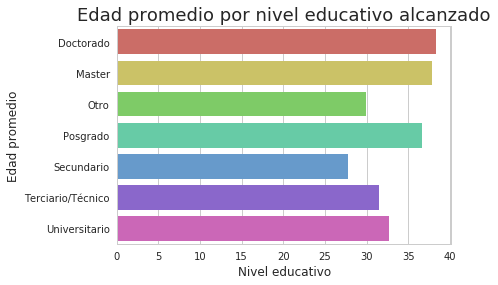

In [36]:
promedio_edad_por_educacion = df_edu_unicos_con_edad.groupby('nombre')['edad'].mean().reset_index()
g = sns.barplot(x=promedio_edad_por_educacion['edad'], y=promedio_edad_por_educacion['nombre'], orient='h', palette="hls")
g.set_title("Edad promedio por nivel educativo alcanzado", fontsize=18)
g.set_xlabel("Nivel educativo", fontsize=12)
g.set_ylabel("Edad promedio", fontsize=12);

In [37]:
del df_edu_unicos_con_edad

# ¿Qué tipo de trabajo eligen los postulantes según la educación alcanzada?

In [38]:
def top_n_tipo_trabajo_educacion(n, educacion):
    top_tipo_trabajo_universitario = df_max_post_detalle.loc[df_max_post_detalle["nombre"] == educacion]\
                                                         .groupby("tipo_de_trabajo")['idpostulante']\
                                                         .count()\
                                                         .sort_values(ascending=False)\
                                                         .head(n)

    g = sns.barplot(x=top_tipo_trabajo_universitario.values, y=top_tipo_trabajo_universitario.index, orient="h", palette="hls")    
    g.set_title("Distibucion de Tipo de trabajo en postulantes {0}".format(educacion), fontsize=18)
    g.set_xlabel("Cantidad", fontsize=12)
    g.set_ylabel("Tipo de Trabajo", fontsize=12);
    
    del top_tipo_trabajo_universitario

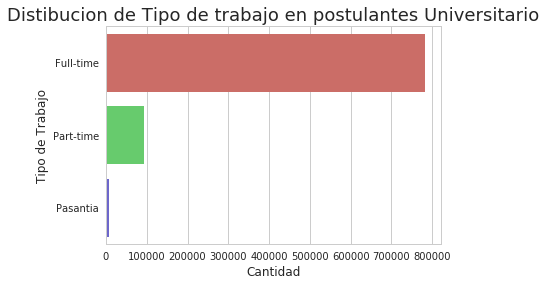

In [39]:
top_n_tipo_trabajo_educacion(3, "Universitario")

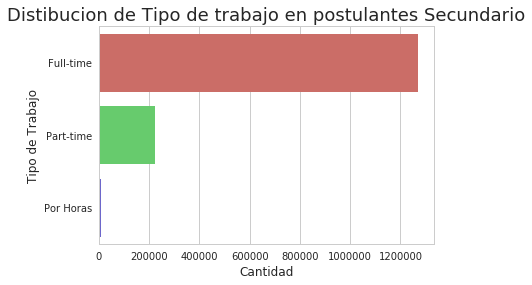

In [40]:
top_n_tipo_trabajo_educacion(3, "Secundario")

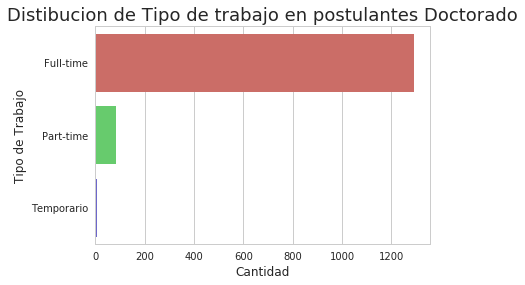

In [41]:
top_n_tipo_trabajo_educacion(3, "Doctorado")

# ¿Cómo es la distribución de edades de los postulantes por sexo?

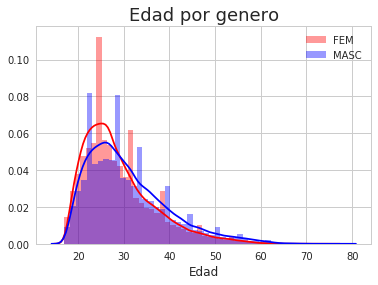

In [42]:
df_gen_edad_valida = df_gen_edad.loc[(17 <= df_gen_edad['edad']) & (df_gen_edad['edad'] <= 80)]

df_edad_fem = df_gen_edad_valida.loc[df_gen_edad_valida['sexo'] == 'FEM']
df_edad_masc = df_gen_edad_valida.loc[df_gen_edad_valida['sexo'] == 'MASC']

g = sns.distplot(df_edad_fem['edad'], color='red', label='FEM', rug=False)
g = sns.distplot(df_edad_masc['edad'], color='blue', label='MASC', rug=False)

g.set_title("Edad por genero", fontsize=18)
g.set_xlabel("Edad", fontsize=12)
g.legend();

In [43]:
del df_edad_fem
del df_edad_masc

# ¿Qué tipo de trabajo eligen los postulantes según su sexo?

In [44]:
id_gen_corto = df_gen_edad_valida[["idpostulante","sexo"]]
df_sexo_tipo_trabajo =df_max_post_detalle.merge(id_gen_corto,on= "idpostulante")[["sexo","tipo_de_trabajo"]]

In [45]:
df_fem_tipo_trabajo = df_sexo_tipo_trabajo[df_sexo_tipo_trabajo["sexo"] == "FEM"]
top3_fem_tipo_trabajo= df_fem_tipo_trabajo.groupby(["tipo_de_trabajo"])\
                      .count()\
                      .sort_values(by= "sexo",ascending=False)\
                      .head(2)
total= float(top3_fem_tipo_trabajo.sum())
top3_fem_tipo_trabajo["porcentaje"] = top3_fem_tipo_trabajo["sexo"].apply(lambda x: round(x/total*100))

In [46]:
df_masc_tipo_trabajo = df_sexo_tipo_trabajo[df_sexo_tipo_trabajo["sexo"] == "MASC"]
top3_masc_tipo_trabajo= df_masc_tipo_trabajo.groupby(["tipo_de_trabajo"])\
                      .count()\
                      .sort_values(by= "sexo",ascending=False)\
                      .head(2)
total= float(top3_masc_tipo_trabajo.sum())
top3_masc_tipo_trabajo["porcentaje"] = top3_masc_tipo_trabajo["sexo"].apply(lambda x: round(x/total*100))

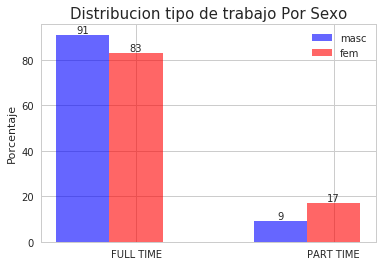

In [47]:
N = 2
ind = np.arange(N)  # la locacion x del grupo
width = 0.27      # el ancho de la barra

fig = plt.figure()
ax = fig.add_subplot(111)

#genero los valores del grafico
mascvals = list(top3_masc_tipo_trabajo["porcentaje"])
rectmasc = ax.bar(ind, mascvals, width, color='b',alpha= 0.6)
femvals = list(top3_fem_tipo_trabajo["porcentaje"])
rectfem = ax.bar(ind+width, femvals, width, color='r',alpha= 0.6)

ax.set_title("Distribucion tipo de trabajo Por Sexo", fontsize=15)
ax.set_ylabel('Porcentaje')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('FULL TIME', 'PART TIME') )
ax.legend( (rectmasc[0], rectfem), ('masc', 'fem') )

#creo la etiquetade los grupos
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rectmasc)
autolabel(rectfem)

In [48]:
del df_fem_tipo_trabajo
del df_masc_tipo_trabajo
del top3_fem_tipo_trabajo
del top3_masc_tipo_trabajo

# ¿Cómo se distribuye el nivel educativo por sexo?

In [49]:
edu_max_genero= df_edu_unicos_max.merge(id_gen_corto, on= "idpostulante")
edu_masc= edu_max_genero[edu_max_genero["sexo"]== "MASC"].groupby("nombre")["idpostulante",].count()
total= float(edu_masc["idpostulante"].sum())
edu_masc["porcentaje"] = edu_masc["idpostulante"].apply(lambda x: round(x/total*100))
edu_masc=edu_masc.reset_index()
edu_masc["prioridad"]= edu_masc["nombre"].apply(lambda nom: orden_nombre.get(nom))
edu_masc = edu_masc.sort_values(by= "prioridad",ascending= False)
edu_masc

,nombre,idpostulante,porcentaje,prioridad
2,Otro,1672,2,6
4,Secundario,45692,51,5
5,Terciario/Técnico,11981,14,4
6,Universitario,25729,29,3
3,Posgrado,2381,3,2
1,Master,1217,1,1
0,Doctorado,57,0,0


In [50]:
edu_fem= edu_max_genero[edu_max_genero["sexo"]== "FEM"].groupby("nombre")["idpostulante",].count()
total= float(edu_fem["idpostulante"].sum())
edu_fem["porcentaje"] = edu_fem["idpostulante"].apply(lambda x: round(x/total*100))
edu_fem=edu_fem.reset_index()
edu_fem["prioridad"]= edu_fem["nombre"].apply(lambda nom: orden_nombre.get(nom))
edu_fem = edu_fem.sort_values(by= "prioridad",ascending= False)
edu_fem

,nombre,idpostulante,porcentaje,prioridad
2,Otro,2073,2,6
4,Secundario,44763,46,5
5,Terciario/Técnico,15500,16,4
6,Universitario,31445,33,3
3,Posgrado,2136,2,2
1,Master,755,1,1
0,Doctorado,56,0,0


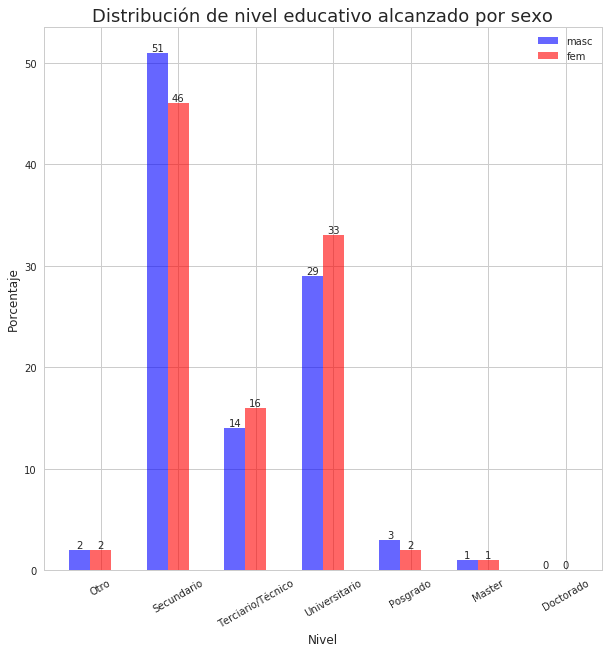

In [51]:
N = 7
ind = np.arange(N)  # la locacion x del grupo
width = 0.27      # el ancho de la barra

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

#genero los valores del grafico
mascvals = list(edu_masc["porcentaje"])
rectmasc = ax.bar(ind, mascvals, width, color='b',alpha= 0.6)
femvals = list(edu_fem["porcentaje"])
rectfem = ax.bar(ind+width, femvals, width, color='r',alpha= 0.6)

ax.set_title("Distribución de nivel educativo alcanzado por sexo", fontsize=18)
ax.set_ylabel('Porcentaje', fontsize=12)
ax.set_xlabel('Nivel', fontsize=12)
ax.set_xticks(ind+width)
ax.set_xticklabels( list(edu_masc["nombre"]))
ax.legend( (rectmasc[0], rectfem), ('masc', 'fem') )

plt.xticks(rotation=30)

#creo la etiquetade los grupos
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rectmasc)
autolabel(rectfem)

In [52]:
# elimino los dataframes que ya no se van a usar
del edu_fem
del edu_masc
del df_sexo_tipo_trabajo
del id_gen_corto

# ¿Qué areas presentan mayor diferencia de aplicantes por sexo?

In [53]:
df_avisos_postulantes = df_gen_edad.merge(df_postulaciones, on='idpostulante').merge(df_avisos_detalle, on='idaviso')

# tabla cruzada con frecuencia de sexo FEM y MASC
ct = pd.crosstab(df_avisos_postulantes['nombre_area'], df_avisos_postulantes['sexo'])

# columnas para comparar y reordenar
ct['tot'] = ct['FEM'] + ct['MASC']
ct['diff'] = ct['FEM'] - ct['MASC']
ct = ct.sort_values(by='diff', ascending=False)

# tomo los top 10 y preparo para graficar
ct_top_fem_stacked = ct.head(10)[['FEM', 'MASC']].stack().reset_index().rename(columns={0:'count'})

# el iloc[::-1] es para invertirlo dado que estamos tomando los 10 ultimos en forma descendiente
ct_top_masc_stacked = ct.tail(10).iloc[::-1][['FEM', 'MASC']].stack().reset_index().rename(columns={0:'count'})

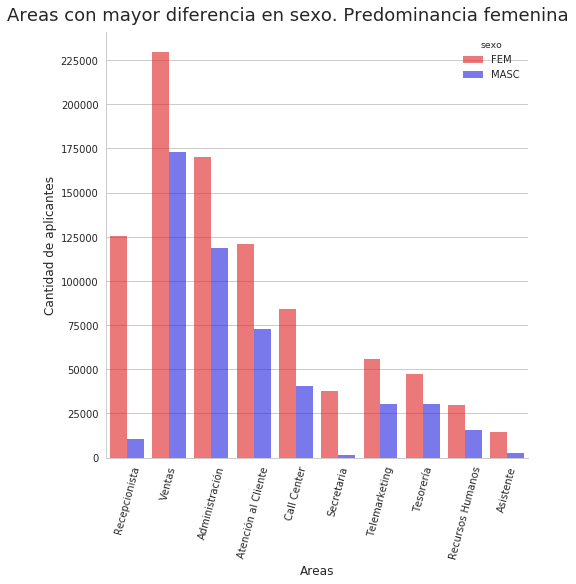

In [54]:
# caso fem
g = sns.factorplot(x='nombre_area', 
                   y='count',
                   data=ct_top_fem_stacked,
                   hue='sexo',
                   palette= {'FEM': 'r', 'MASC': 'b'},
                   errwidth=0.8,
                   kind="bar",
                   legend_out=False,
                   size=7,
                   alpha=0.6)

g.set_xticklabels(rotation=75)

g.set_xlabels("Areas", fontsize=12)
g.set_ylabels("Cantidad de aplicantes", fontsize=12)

yticks = np.arange(0, 250000, 25000)
g.set(yticks=yticks)

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Areas con mayor diferencia en sexo. Predominancia femenina', fontsize=18);

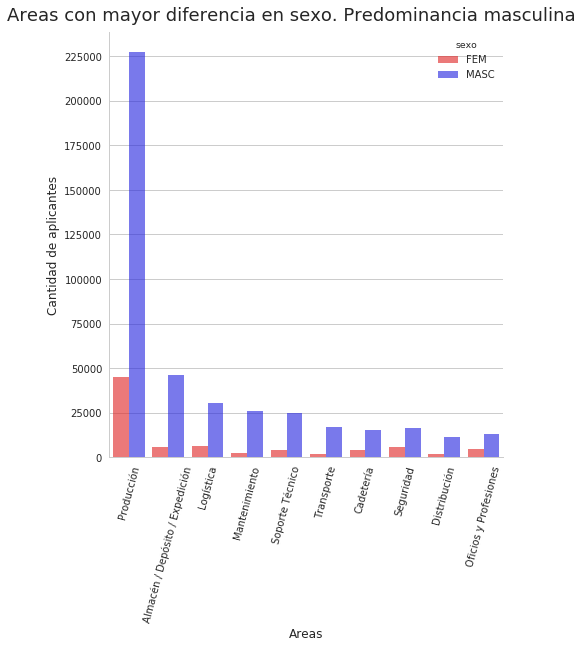

In [55]:
# caso masc
g = sns.factorplot(x='nombre_area', 
                   y='count',
                   data=ct_top_masc_stacked,
                   hue='sexo',
                   palette= {'FEM': 'red', 'MASC': 'blue'},
                   errwidth=0.8,
                   kind="bar",
                   legend_out=False,
                   size=7,
                   alpha=0.6)

g.set_xticklabels(rotation=75)

g.set_xlabels("Areas", fontsize=12)
g.set_ylabels("Cantidad de aplicantes", fontsize=12)

yticks = np.arange(0, 250000, 25000)
g.set(yticks=yticks)

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Areas con mayor diferencia en sexo. Predominancia masculina', fontsize=18);

In [56]:
del ct_top_fem_stacked
del ct_top_masc_stacked
del ct
del df_avisos_postulantes

# ¿En qué horas se registra la mayor cantidad de postulaciones/vistas?

In [57]:
df_vistas["hour"] = df_vistas["timestamp"].dt.hour
#df_vistas["date"] = df_vistas["timestamp"].dt.date
df_postulaciones["hour"] = df_postulaciones["fechapostulacion"].dt.hour
#df_postulaciones["date"] = df_postulaciones["fechapostulacion"].dt.date
df_postulaciones["weekday"] = df_postulaciones["fechapostulacion"].dt.weekday

In [58]:
df_postulaciones["corrected_hour"] = (df_postulaciones["fechapostulacion"] + pd.DateOffset(hours=5)).dt.hour

In [59]:
def postulaciones_dias_heatmap(col_agrupacion_horas):
    postulaciones_dia_hora = df_postulaciones.groupby(["weekday",col_agrupacion_horas])["idaviso",].count()
    postulaciones_dia_hora = postulaciones_dia_hora.reset_index()
    pivot_post = postulaciones_dia_hora.pivot_table(index=col_agrupacion_horas, columns="weekday", values= "idaviso")
    pivot_post = pivot_post.sort_index(ascending=False)
    plt.figure(figsize=(7,5.6))
    cmap = sns.cm.rocket_r
    g = sns.heatmap(pivot_post, xticklabels = ['Mon','Tue','Wen','Thu','Fri','Sut','Sun'] ,cmap= cmap)
    g.set_title("Distribución de Postulaciones", fontsize=18)
    g.set_xlabel("Día", fontsize=12)
    g.set_ylabel("Hora", fontsize=12)

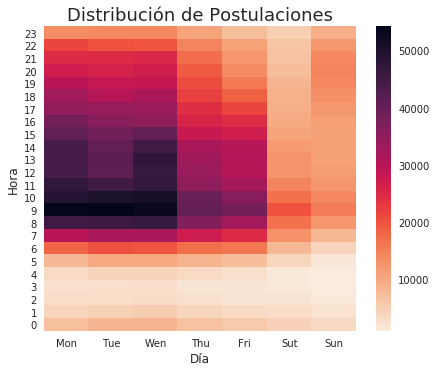

In [60]:
postulaciones_dias_heatmap("hour")

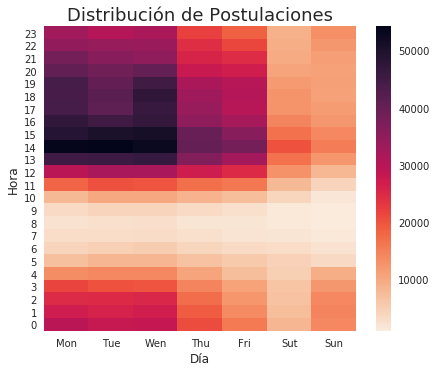

In [61]:
postulaciones_dias_heatmap("corrected_hour")

In [62]:
date_ini = datetime.date(year=2018,month=2,day=23)
date_fin = datetime.date(year=2018,month=2,day=28)
df_periodo_postulaciones = df_postulaciones[df_postulaciones["fechapostulacion"].dt.date >= date_ini]
df_periodo_vistas = df_vistas[(df_vistas["timestamp"].dt.date >= date_ini) & (df_vistas["timestamp"].dt.date <= date_fin)]

In [63]:
def postulaciones_vistas_radial(extractor_clave_agrupamiento):
    # extractor_clave_agrupamiento puede ser un string o una funcion
    # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
    
    categories = range(0, 24)
    N = len(categories)

    def avarage (list):
        for i in range(0,len(list)):
            list[i] = list[i]/((date_fin-date_ini).days)

    from math import pi
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # inicializar grafica
    ax = plt.subplot(111, polar=True)

    # buscamos que el primer valor comienze desde arriba:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # dibujar cada tick con su label
    plt.xticks(angles[:-1], categories)

    # dibujar labels para el eje y
    ax.set_rlabel_position(0)
    plt.yticks([2500,5000,7500,10000,12500], ["2.5","5","7.5","10","12.5","15"], color="grey", size=10)
    plt.ylim(0,15000)

    values2 = list(df_periodo_vistas.groupby("hour")["idAviso"].count())
    values2 += values2[:1]
    avarage(values2)
    ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Cantidad Promedio de Vistas por Hora")
    ax.fill(angles, values2, 'b', alpha=0.1)

    values = list(df_periodo_postulaciones.set_index("fechapostulacion").groupby(extractor_clave_agrupamiento)["idaviso"].count())
    values += values[:1]
    avarage(values)
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = "C2", label="Cantidad Promedio de Postulaciones por Hora")
    ax.fill(angles, values, 'r', alpha=0.1)

    plt.suptitle('Cantidad de vistas y postulaciones promedio por hora', fontsize=18)
    plt.subplots_adjust(top=.825)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1));

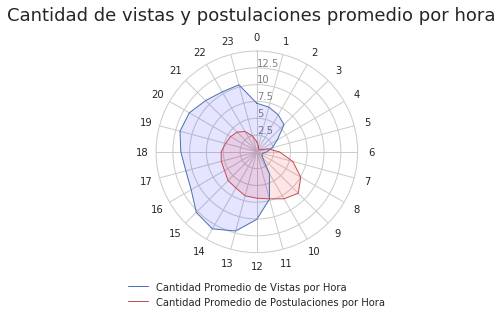

In [64]:
postulaciones_vistas_radial("hour")

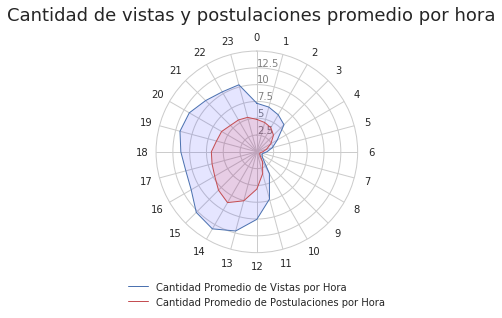

In [65]:
def groupby_date_add_5_hours(x):
    return (x + pd.DateOffset(hours=5)).hour

postulaciones_vistas_radial("corrected_hour")

In [66]:
df_postulaciones.drop(labels="corrected_hour", axis=1, inplace=True)

# ¿Cómo fue la evolución de postulaciones y vistas?

In [67]:
# columna con fecha y hora
df_postulaciones['datehour'] = pd.to_datetime({'year': df_postulaciones['fechapostulacion'].dt.year,
                                               'month': df_postulaciones['fechapostulacion'].dt.month,
                                               'day': df_postulaciones['fechapostulacion'].dt.day,
                                               'hour': df_postulaciones['fechapostulacion'].dt.hour})
df_vistas['datehour'] = pd.to_datetime({'year': df_vistas['timestamp'].dt.year,
                                       'month': df_vistas['timestamp'].dt.month,
                                       'day': df_vistas['timestamp'].dt.day,
                                       'hour': df_vistas['timestamp'].dt.hour})

In [68]:
# Tomamos el rango comun entre los dos sets de datos
datehour_min = max(min(df_vistas['datehour']), min(df_postulaciones['datehour']))
datehour_max = min(max(df_vistas['datehour']), max(df_postulaciones['datehour']))

postulaciones_por_fecha_y_hora = df_postulaciones.loc[(datehour_min <= df_postulaciones['datehour']) & (df_postulaciones['datehour'] <= datehour_max)].groupby("datehour")["idaviso"].count().sort_index()
vistas_por_fecha_y_hora = df_vistas.loc[(datehour_min <= df_vistas['datehour']) & (df_vistas['datehour'] <= datehour_max)].groupby("datehour")["idAviso"].count().sort_index()

#### Gráfica de linea

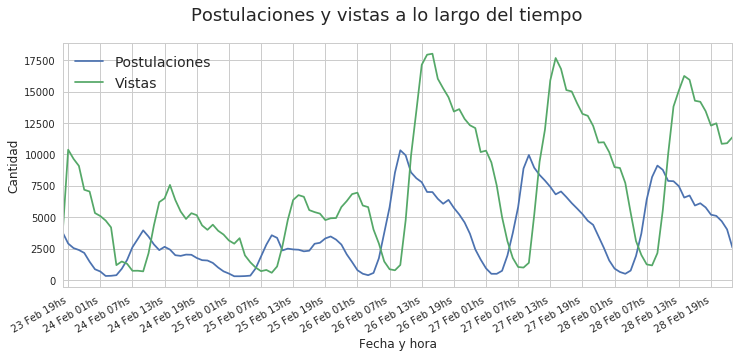

In [69]:
fig, ax = plt.subplots()

ax.plot(postulaciones_por_fecha_y_hora.index, postulaciones_por_fecha_y_hora)
ax.plot(vistas_por_fecha_y_hora.index, vistas_por_fecha_y_hora)

fig = ax.get_figure()
fig.suptitle("Postulaciones y vistas a lo largo del tiempo", fontsize=18)
fig.set_figwidth(12)
fig.set_figheight(5)

ax.set_xlabel("Fecha y hora", fontsize=12)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlim(datehour_min, datehour_max)

ax.xaxis.set_major_locator(mpldates.HourLocator(byhour=np.arange(0,24), interval=6))
ax.xaxis.set_major_formatter(mpldates.DateFormatter("%d %h %Hhs"))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Postulaciones', 'Vistas'], fontsize=14)

fig.autofmt_xdate()

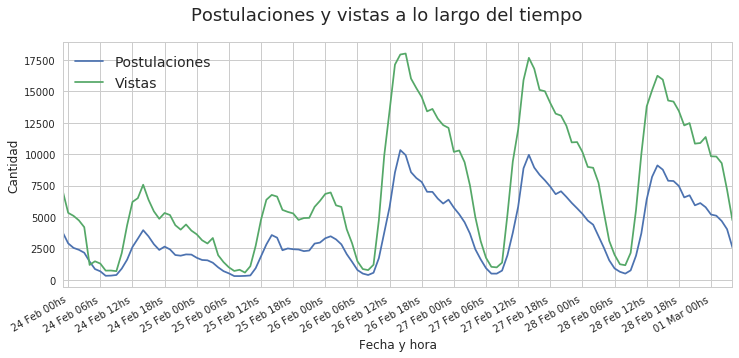

In [70]:
# Correjimos el offset de 5 horas que hay entre postulacioens y vistas
postulaciones_por_fecha_y_hora.index = postulaciones_por_fecha_y_hora.index.map(lambda x: x + pd.DateOffset(hours=5))
# Regeneramos el rango común entre ambos dado que correjimos la hora de postulaciones
datehour_min = max(min(df_vistas['datehour']), min(postulaciones_por_fecha_y_hora.index))
datehour_max = min(max(df_vistas['datehour']), max(postulaciones_por_fecha_y_hora.index))
vistas_por_fecha_y_hora = df_vistas.loc[(datehour_min <= df_vistas['datehour']) & (df_vistas['datehour'] <= datehour_max)].groupby("datehour")["idAviso"].count().sort_index()

fig, ax = plt.subplots()

ax.plot(postulaciones_por_fecha_y_hora.index, postulaciones_por_fecha_y_hora)
ax.plot(vistas_por_fecha_y_hora.index, vistas_por_fecha_y_hora)

fig = ax.get_figure()
fig.suptitle("Postulaciones y vistas a lo largo del tiempo", fontsize=18)
fig.set_figwidth(12)
fig.set_figheight(5)

ax.set_xlabel("Fecha y hora", fontsize=12)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlim(datehour_min, datehour_max)

ax.xaxis.set_major_locator(mpldates.HourLocator(byhour=np.arange(0,24), interval=6))
ax.xaxis.set_major_formatter(mpldates.DateFormatter("%d %h %Hhs"))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Postulaciones', 'Vistas'], fontsize=14)

fig.autofmt_xdate()

In [71]:
del postulaciones_por_fecha_y_hora
del vistas_por_fecha_y_hora

#### Heatmap

In [72]:
# Vamos a usar solo las fechas para determinar el rango comun
date_min = max(min(df_vistas['date']), min(df_postulaciones['date']))
date_max = min(max(df_vistas['date']), max(df_postulaciones['date']))

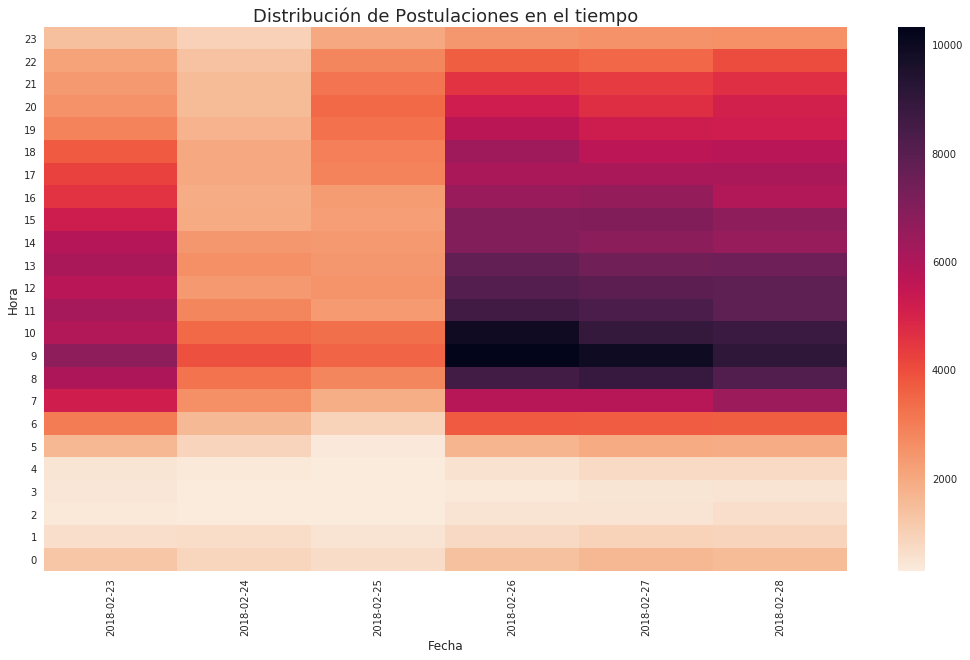

In [73]:
postulaciones_dia_hora = df_postulaciones.loc[(date_min <= df_postulaciones['date']) & (df_postulaciones['date'] <= date_max)]\
                                         .groupby(["date","hour"])["idaviso",].count()
postulaciones_dia_hora = postulaciones_dia_hora.reset_index()
pivot_post = postulaciones_dia_hora.pivot_table(index= "hour", columns="date", values= "idaviso")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r

g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribución de Postulaciones en el tiempo", fontsize=18)
g.set_xlabel("Fecha", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(18)
fig.set_figheight(10)

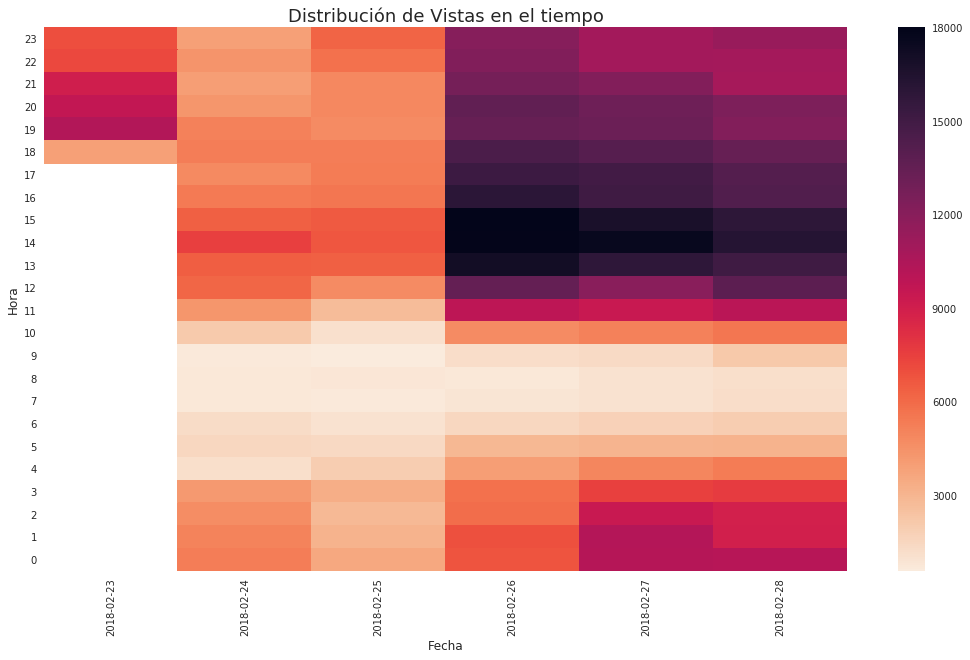

In [74]:
vistas_dia_hora = df_vistas.loc[(date_min <= df_vistas['date']) & (df_vistas['date'] <= date_max)]\
                           .groupby(["date","hour"])["idAviso",].count()
vistas_dia_hora = vistas_dia_hora.reset_index()
pivot_post = vistas_dia_hora.pivot_table(index= "hour", columns="date", values= "idAviso")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r

g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribución de Vistas en el tiempo", fontsize=18)
g.set_xlabel("Fecha", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

fig = g.get_figure()
fig.set_figwidth(18)
fig.set_figheight(10)

In [75]:
df_postulaciones.drop(labels='datehour', axis=1, inplace=True)
df_vistas.drop(labels='datehour', axis=1, inplace=True)
del postulaciones_dia_hora
del vistas_dia_hora
del pivot_post

# ¿Qué areas y empresas tienen mayor cantidad de postulaciones?

In [76]:
df_posts_avisos = df_avisos_detalle[['idaviso','nombre_area','denominacion_empresa', 'nivel_laboral']].merge(df_postulaciones[['idaviso','fechapostulacion','idpostulante']], on='idaviso')
df_posts_avisos['fecha'] = df_posts_avisos['fechapostulacion'].dt.date

In [77]:
def graficar_top_n_postulaciones(N, clave_agrupacion, clave_titulo, x_tick_step=1):
    df_posts_agrupado = df_posts_avisos.groupby(clave_agrupacion)\
                                        .agg({'idpostulante':'count'})\
                                        .rename(columns={'idpostulante': 'count'})

    tot = df_posts_agrupado['count'].sum()

    df_posts_agrupado['perc'] = df_posts_agrupado['count'] * 100.0 / tot
    df_posts_agrupado = df_posts_agrupado.sort_values(by='count', ascending=False)
    df_posts_agrupado = df_posts_agrupado.reset_index()

    df_top_posts = pd.DataFrame(df_posts_agrupado.head(N))

    max_perc = math.ceil(df_top_posts['perc'].max())
    xticks = np.arange(0, max_perc, x_tick_step)

    g = sns.barplot(x=df_top_posts['perc'], y=df_top_posts[clave_agrupacion], orient='h',
                    palette="hls")
    g.set_title("Top {0} de postulaciones por {1}".format(N, clave_titulo.lower()), fontsize=18)
    g.set_xlabel("Postulaciones (%)", fontsize=12)
    g.set_ylabel(clave_titulo, fontsize=12)
    g.set(xticks=xticks);
    
    return g

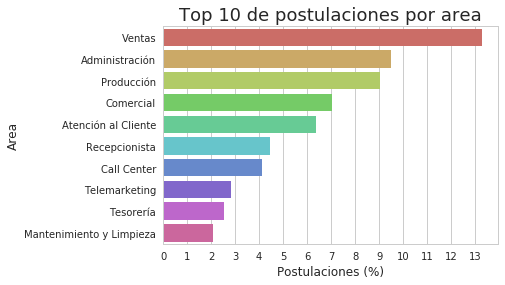

In [78]:
graficar_top_n_postulaciones(10, 'nombre_area', 'Area');

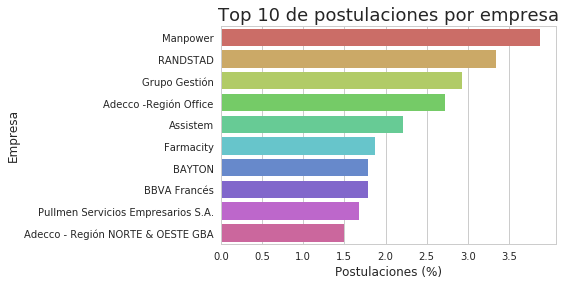

In [79]:
graficar_top_n_postulaciones(10, 'denominacion_empresa', 'Empresa', x_tick_step=0.5);

# ¿Cuál es la cantidad de avisos y postulaciones por nivel laboral area?

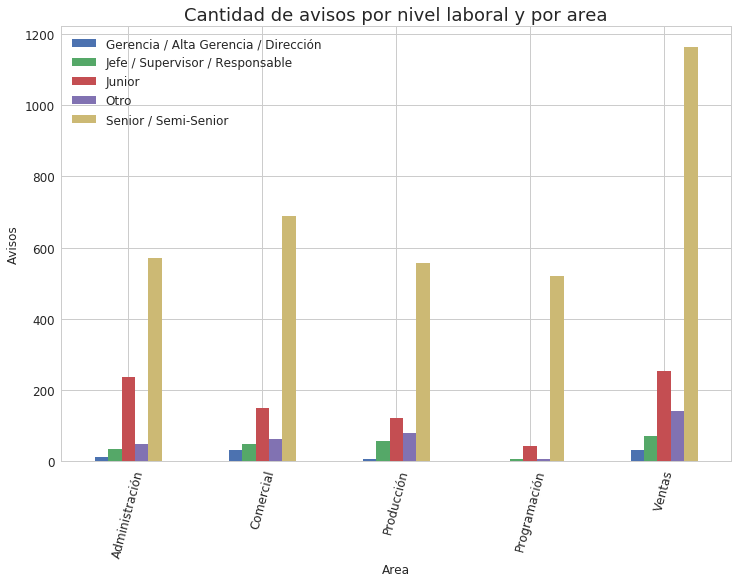

In [80]:
#obtenemos las 5 areas con mas avisos
top_areas = df_avisos_detalle['nombre_area'].value_counts()\
                                            .sort_values(ascending=False)\
                                            .head(5)\
                                            .keys()\
                                            .tolist()

df_top_area_laboral = df_avisos_detalle.loc[df_avisos_detalle['nombre_area'].isin(top_areas)]\
                                       .groupby(['nombre_area','nivel_laboral'])\
                                       .agg({'nombre_area':'count'})\
                                       .rename(columns = {'nombre_area':'cant_avisos'})

axs = df_top_area_laboral.reset_index()\
                         .pivot(index = 'nombre_area', columns = 'nivel_laboral', values='cant_avisos')\
                         .plot(kind = 'bar', figsize =(12,8), fontsize = 12, rot=75,
                                title ='Cantidad de avisos por nivel laboral y por area')

axs.set_ylabel('Avisos', size = 12)
axs.set_xlabel('Area', size = 12)
axs.legend(fontsize = 12)
axs.title.set_size(18)

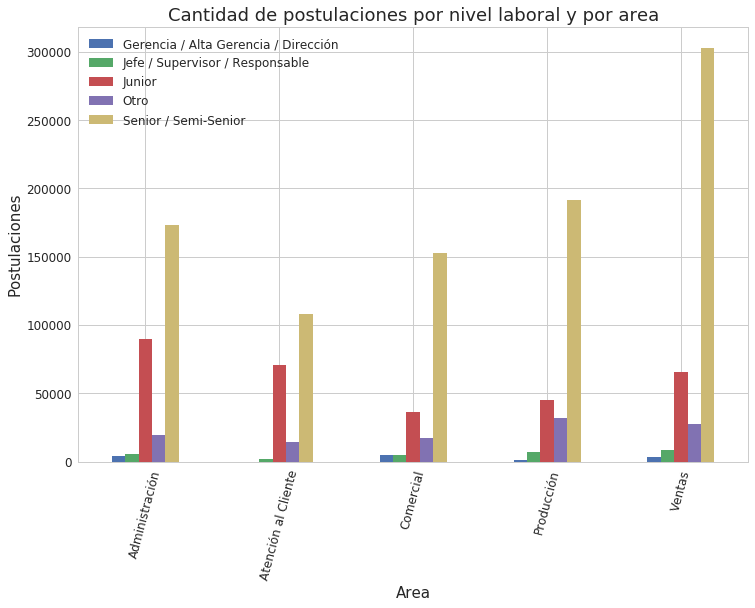

In [81]:
#obtenemos las 5 areas con mas postulaciones
top_post_areas = df_posts_avisos['nombre_area'].value_counts()\
                                              .sort_values(ascending = False)\
                                              .head(5)\
                                              .keys()\
                                              .tolist()
                
df_top_posts_area =  df_posts_avisos.loc[df_posts_avisos['nombre_area'].isin(top_post_areas)]\
                                    .groupby(['nombre_area','nivel_laboral'])\
                                    .agg({'nombre_area':'count'})\
                                    .rename(columns = {'nombre_area':'count'})

axs = df_top_posts_area.reset_index()\
                       .pivot(index = 'nombre_area', columns = 'nivel_laboral', values='count')\
                       .plot(kind = 'bar', figsize =(12,8), fontsize = 12, rot=75,
                             title ='Cantidad de postulaciones por nivel laboral y por area')

axs.set_ylabel('Postulaciones', size = 15)
axs.set_xlabel('Area', size = 15)
axs.legend(fontsize = 12)
axs.title.set_size(18)

In [82]:
del df_top_posts_area
del df_top_area_laboral
del top_areas
del top_post_areas
del df_posts_avisos

# ¿Qué edades hacen mayor uso de la plataforma?

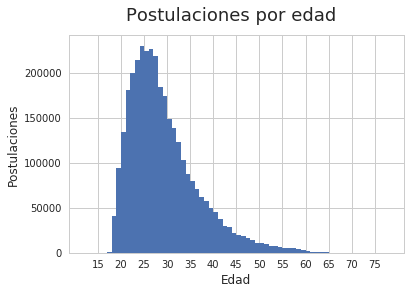

In [83]:
postulaciones_por_edades = df_postulaciones[['idpostulante']].merge(df_gen_edad[['idpostulante', 'edad']], on='idpostulante')

postulaciones_por_edades = postulaciones_por_edades.loc[(0 < postulaciones_por_edades['edad']) & (postulaciones_por_edades['edad'] <= 80)]

min_edad = min(postulaciones_por_edades['edad'])
max_edad = max(postulaciones_por_edades['edad'])

ax = postulaciones_por_edades.hist(bins=(max_edad - min_edad))[0][0]

xticks = np.arange(15, 80, 5)

ax.set_title('')
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Postulaciones', fontsize=12)
ax.set_xticks(xticks)

fig = ax.get_figure()
fig.suptitle('Postulaciones por edad', fontsize=18);

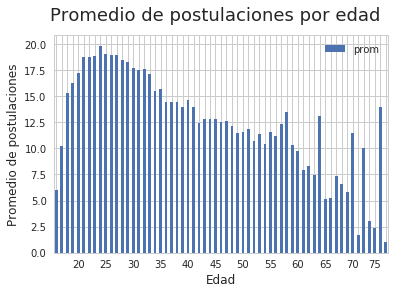

In [84]:
postulaciones_por_edades['aux'] = 1
prom_postulaciones_por_edades = postulaciones_por_edades.groupby(['edad', 'idpostulante'])\
                                                        .count()\
                                                        .reset_index()\
                                                        .groupby('edad')\
                                                        .agg({'aux':'mean'})\
                                                        .reset_index()\
                                                        .rename(columns={'aux':'prom'})
                        
ax = prom_postulaciones_por_edades.set_index('edad').plot.bar()

# oculto labels no multiplos de 5
for t in ax.get_xticklabels():
    if int(t.get_text()) % 5 != 0:
        t.set_visible(False)        

ax.set_title('')
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Promedio de postulaciones', fontsize=12)

fig = ax.get_figure()
fig.suptitle('Promedio de postulaciones por edad', fontsize=18)

plt.xticks(rotation=0);

In [ ]:
df_gen_edad_valida.groupby('edad')\
                  .count()\
                  .rename(columns={'idpostulante':'count'})\
                  .sort_values(by='count')\
                  .loc[lambda x: x['count'] < 100,:]
                
# Las edades más altas tienen en promedio mayor cantidad de postulaciones
# por la baja cantidad de personas en esos grupos

,count,fechanacimiento,sexo
edad,,,
78,1,1,1
74,1,1,1
76,1,1,1
73,2,2,2
71,3,3,3
75,5,5,5
70,7,7,7
69,10,10,10
68,15,15,15


# ¿Cómo se distribuyen las edades para los distintos niveles laborales?

In [ ]:
df_postulantes_por_aviso = df_gen_edad[['idpostulante', 'edad']].merge(df_postulaciones[['idpostulante', 'idaviso']], on='idpostulante')\
                                                                .merge(df_avisos_detalle[['idaviso','nivel_laboral']], on='idaviso')

g = sns.FacetGrid(df_postulantes_por_aviso.loc[(0 <= df_postulantes_por_aviso['edad']) & (df_postulantes_por_aviso['edad'] <= 80)], col="nivel_laboral", hue="nivel_laboral", col_wrap=2, size=6)
g.map(sns.distplot, "edad", rug=False)
g.set_titles("Nivel: {col_name}", fontsize=14)

for ax in g.axes.flat:
    plt.setp(ax.get_yticklabels(), visible=True)
    plt.setp(ax.get_xticklabels(), visible=True)
    ax.set_xlabel('Edad', fontsize=12)

plt.tight_layout()

In [ ]:
del df_postulantes_por_aviso